In [1]:
import numpy as np
from fft_tdse.simulator import *
from fft_tdse.animator import *
import matplotlib.pyplot as plt


In [2]:
x_min = -100
x_max = 100
nx = 1024

R_atom = 1.0

def potential(x, y):
    # nuclear forces on particles 1 and 2
    V1 = -1.0 * ((x-R_atom)**2 + 0.25)**(-.5) - 1.0 * ((x+R_atom)**2 + 0.25)**(-.5)
    V2 = -1.0 * ((y-R_atom)**2 + 0.25)**(-.5) - 1.0 * ((y+R_atom)**2 + 0.25)**(-.5)
    # repulsion between particles 1 and 2
    V12 = 1.0 * ((x-y)**2 + 0.25)**(-.5)
    return V1 + V2 + V12

laser = LaserPulse(omega=0.25, t0=20.0, T=60.0, E0=0.1)
def laser_potential(x, y):
    return x + y

In [3]:
sim = Simulator(verbose=True)
sim.set_dimension(2)
sim.set_mass(1.0)
sim.set_charge(-1.0)
sim.set_laser_pulse(laser)
sim.set_laser_potential(laser_potential)
sim.set_potential(potential)
sim.set_grid([x_min, x_min], [x_max, x_max], [nx, nx])

ic| message: 'Dimension set to 2'


In [4]:
sim.set_time_parameters(0.0, 150.0, 15000)

ic| 'Time grid:'
ic| self.t0: 0.0, self.t1: 150.0, self.n_steps: 15000


In [5]:
sim.prepare()

ic| hasattr(self, 'gs'): False
ic| 'computing ground state ... '
ic| 'not using guess for ground state ... '


Initial guess: resid = 54.587096458284314, E = 86.17210489137962
Iteration 0, delta = 0.9018471900512425, resid = 21.554102277524517, E = 11.407055702861754
Iteration 1, delta = 0.5369416009218094, resid = 3.5315858157163706, E = 1.36306388441665
Iteration 2, delta = 0.3852163159534546, resid = 1.6982756698762764, E = -0.3211573324413812
Iteration 3, delta = 0.3664558127627943, resid = 1.2079757106530176, E = -1.3525705300689017
Iteration 4, delta = 0.33622708267795165, resid = 0.8601024153998968, E = -2.03221530050429
Iteration 5, delta = 0.2936833986074504, resid = 0.6138501471892119, E = -2.45861027548771
Iteration 6, delta = 0.23080709154518406, resid = 0.42020920599880685, E = -2.6965320833705375
Iteration 7, delta = 0.16316357486182942, resid = 0.27536954951880743, E = -2.8097716986896355
Iteration 8, delta = 0.11056700037429698, resid = 0.1800264414408162, E = -2.8598285737877442
Iteration 9, delta = 0.07660958710188297, resid = 0.12267593254721894, E = -2.882779398818866
Iterat

ic| hasattr(self, 'gs'): True


Iteration 235, delta = 9.767699120471336e-13, resid = 1.4875775423252854e-12, E = -2.930860162632646
Inverse iterations terminated successfully.


In [6]:
V = sim.ham.V
psi0 = sim.wf.psi.copy()


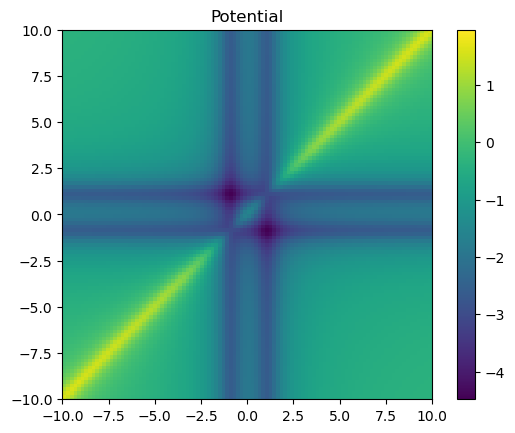

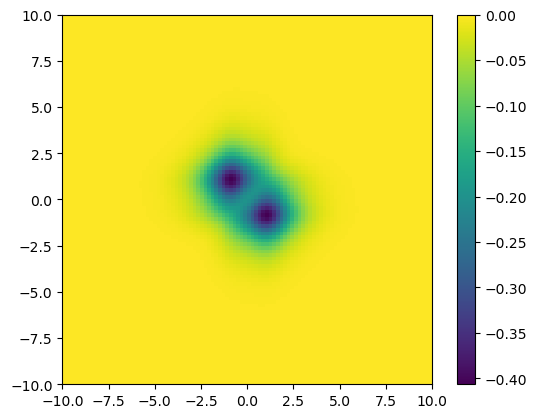

In [7]:
plt.figure()
plt.imshow(V.T, extent = [x_min, x_max, x_min, x_max], origin='lower')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.colorbar()
plt.title('Potential')
plt.show()

plt.figure()
plt.imshow(psi0.real.T, extent = [x_min, x_max, x_min, x_max], origin='lower')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.colorbar()
plt.show()

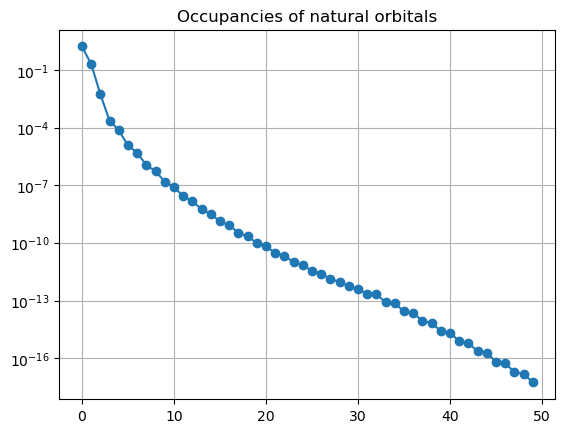

In [8]:
norm = sim.wf.psiNorm()
u, s, v = np.linalg.svd(psi0.real)
occ = 2 * s**2 * sim.grid.dtau

plt.figure()
y = occ[:50]
plt.semilogy(y, 'o-')
plt.title('Occupancies of natural orbitals')
plt.grid(True)
plt.show()


ic| hasattr(self, 'gs'): True
ic| 'reusing ground state from previous computation'
ic| self.format: './frames/frame%05d.png'
ic| 'Running simulation...'


  0%|          | 0/15000 [00:00<?, ?it/s]

KeyboardInterrupt: 

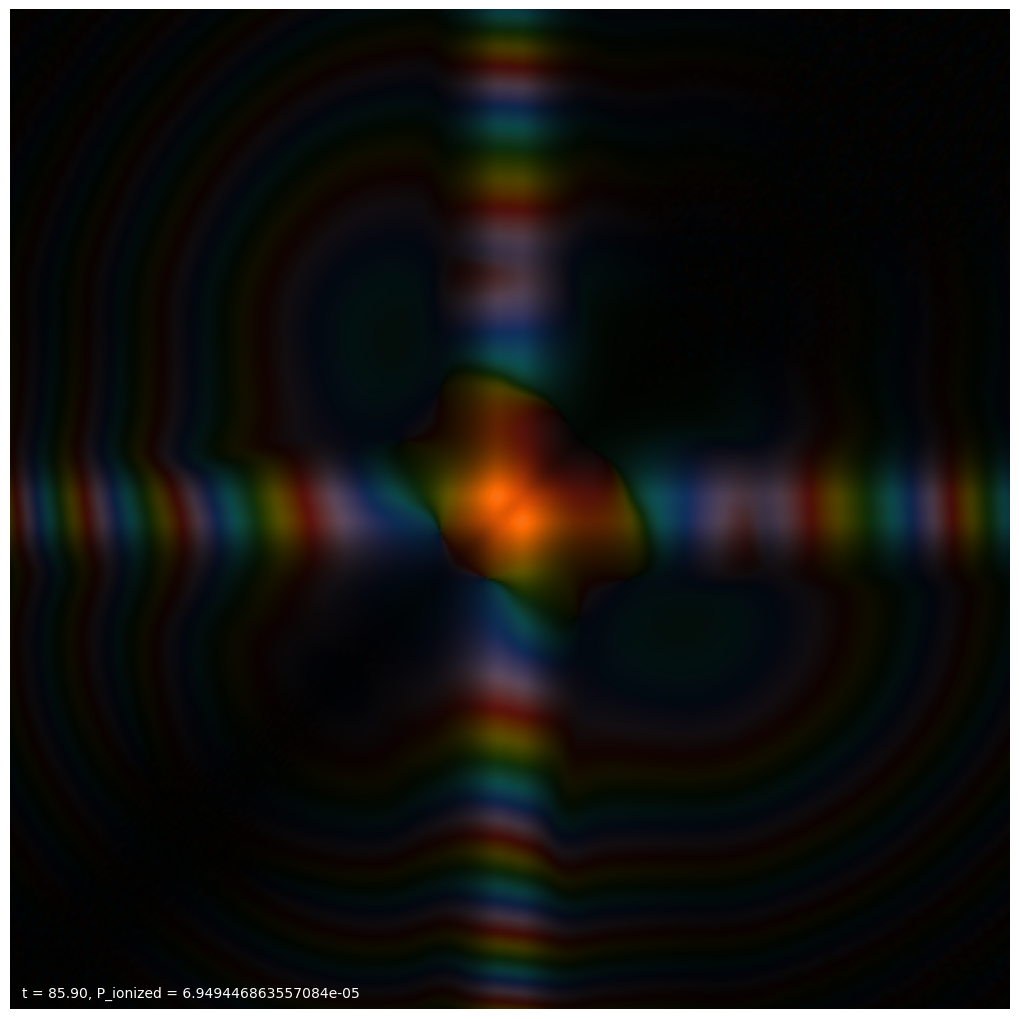

In [9]:
sim.prepare()

anim1 = Animator2d(sim, folder='./frames/')
anim1.vis_type = 'complex'
anim1.energy_shift = sim.gs.E
anim1.show_axis = False
anim1.xlim = [-40, 40]
anim1.ylim = [-40, 40]
anim1.mag_map = lambda r: r**.25
anim1.set_interval(10)
anim1.set_framesize(1024, 1024)

# initialize figure, and add potential visualization
anim1.init_figure()


anim_callback1 = anim1.get_callback()
anim1.caption_format = 't = {sim.t:.02f}, P_ionized = {sim.P_ionized}'
P_hist = np.zeros_like(sim.t_grid)
def callback(sim):
    psi_out = np.where((np.abs(sim.x) > 40) | (np.abs(sim.y) > 40), sim.psi, np.zeros_like(sim.psi))
    P_hist[sim.t_index] = np.sum(np.abs(psi_out)**2) * sim.grid.dtau
    sim.P_ionized = P_hist[sim.t_index]
    anim_callback1(sim)
    
    
sim.simulate(callback=callback)
anim1.make_movie("h2_molecule_1d.mp4")
anim1.clean_frames()


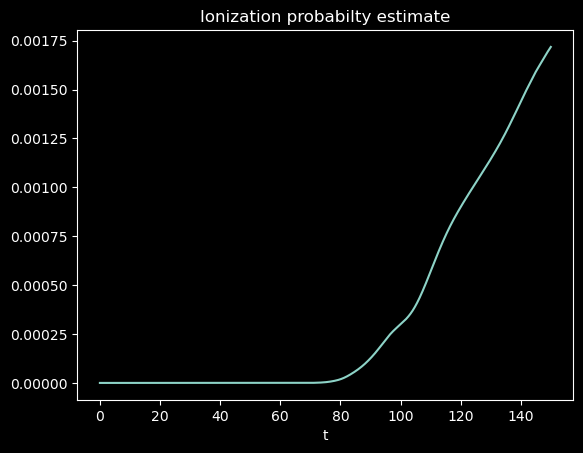

In [37]:
plt.figure()
plt.plot(sim.t_grid[:-1], P_hist[:-1])
plt.title('Ionization probabilty estimate')
plt.xlabel('t')
plt.show()

In [ ]:
sim.ham.D

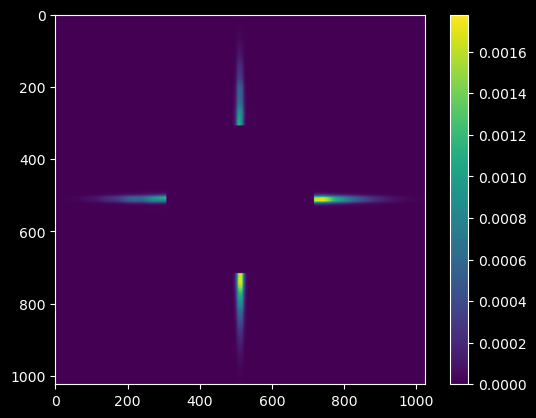

In [27]:
psi_out = np.where((np.abs(sim.x) > 40) | (np.abs(sim.y) > 40), sim.psi, np.zeros_like(sim.psi))
plt.figure()

plt.imshow(np.abs(psi_out))
plt.colorbar()

In [11]:
help(np.where)

Help on _ArrayFunctionDispatcher in module numpy:

where(...)
    where(condition, [x, y], /)
    
    Return elements chosen from `x` or `y` depending on `condition`.
    
    .. note::
        When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses. The rest of this
        documentation covers only the case where all three arguments are
        provided.
    
    Parameters
    ----------
    condition : array_like, bool
        Where True, yield `x`, otherwise yield `y`.
    x, y : array_like
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray
        An array with elements from `x` where `condition` is True, and elements
        from `y` elsewhere.
    
    See Also
    --------
    choose
    nonzero : The function that is called